In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def lotka_volterra(t, x, y, a11, a12, a21, a22):
    dx_dt = a11 * x - a12 * x * y
    dy_dt = a21 * x * y - a22 * y
    return dx_dt, dy_dt

def runge_kutta(t0, x0, y0, h, T, a11, a12, a21, a22):
    steps = int(T / h)
    t_values = np.linspace(t0, T, steps + 1)
    x_values = np.zeros(steps + 1)
    y_values = np.zeros(steps + 1)
    
    x_values[0] = x0
    y_values[0] = y0
    
    for i in range(steps):
        t = t_values[i]
        x, y = x_values[i], y_values[i]
        
        k1x, k1y = lotka_volterra(t, x, y, a11, a12, a21, a22)
        k2x, k2y = lotka_volterra(t + h/2, x + h/2 * k1x, y + h/2 * k1y, a11, a12, a21, a22)
        k3x, k3y = lotka_volterra(t + h/2, x + h/2 * k2x, y + h/2 * k2y, a11, a12, a21, a22)
        k4x, k4y = lotka_volterra(t + h, x + h * k3x, y + h * k3y, a11, a12, a21, a22)
        
        x_values[i + 1] = x + h * (k1x + 2 * k2x + 2 * k3x + k4x) / 6
        y_values[i + 1] = y + h * (k1y + 2 * k2y + 2 * k3y + k4y) / 6
    
    return t_values, x_values, y_values

In [15]:

# Параметри
a11 = 0.15
a12 = 0.0015
a21 = 0.0015
a22 = 0.6
x0 = 850
y0 = 550
t0 = 0
h = 0.1
T = 150

# Запуск методу Рунге-Кутта
t_values, x_values, y_values = runge_kutta(t0, x0, y0, h, T, a11, a12, a21, a22)

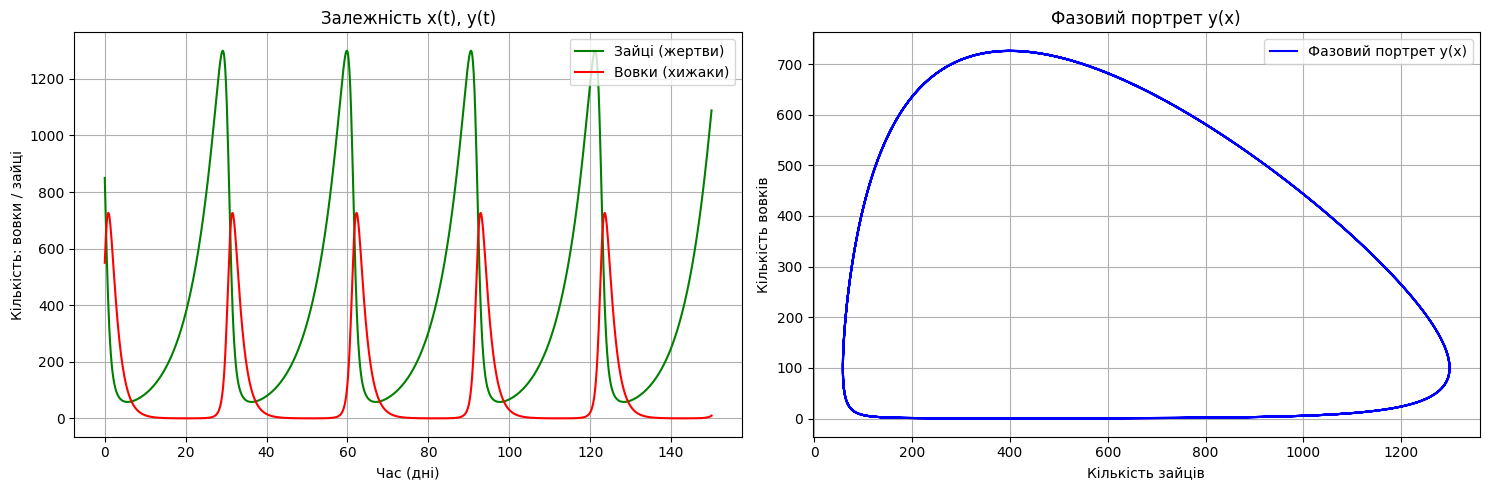

In [16]:
# Побудова графіків
plt.figure(figsize=(15, 5))

# Графік x(t)
plt.subplot(1, 2, 1)
plt.plot(t_values, x_values, label='Зайці (жертви)', color='green')
plt.plot(t_values, y_values, label='Вовки (хижаки)', color='red')
plt.xlabel('Час (дні)')
plt.ylabel('Кількість: вовки / зайці')
plt.title('Залежність x(t), y(t)')
plt.legend()
plt.grid()

# Фазовий портрет y(x)
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values, label='Фазовий портрет y(x)', color='blue')
plt.xlabel('Кількість зайців')
plt.ylabel('Кількість вовків')
plt.title('Фазовий портрет y(x)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()